1. import data
2. EDA
3. split the data into trainin and testing
4. find loss MSE and Huber loss
5. plot histrogram of losses



In [ ]:
import pandas as pd
import numpy as np
import keras
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bearings=pd.read_csv('/content/drive/MyDrive/GANs/ai4i2020.csv')
bearings.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
bearings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
bearings.describe

<bound method NDFrame.describe of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]

In [ ]:
bearings = bearings.drop(columns = ['UDI','Product ID','Type'])

In [ ]:
bearings.shape

(10000, 11)

In [ ]:
bearings.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
df1 = bearings.iloc[:,0:5]
df1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


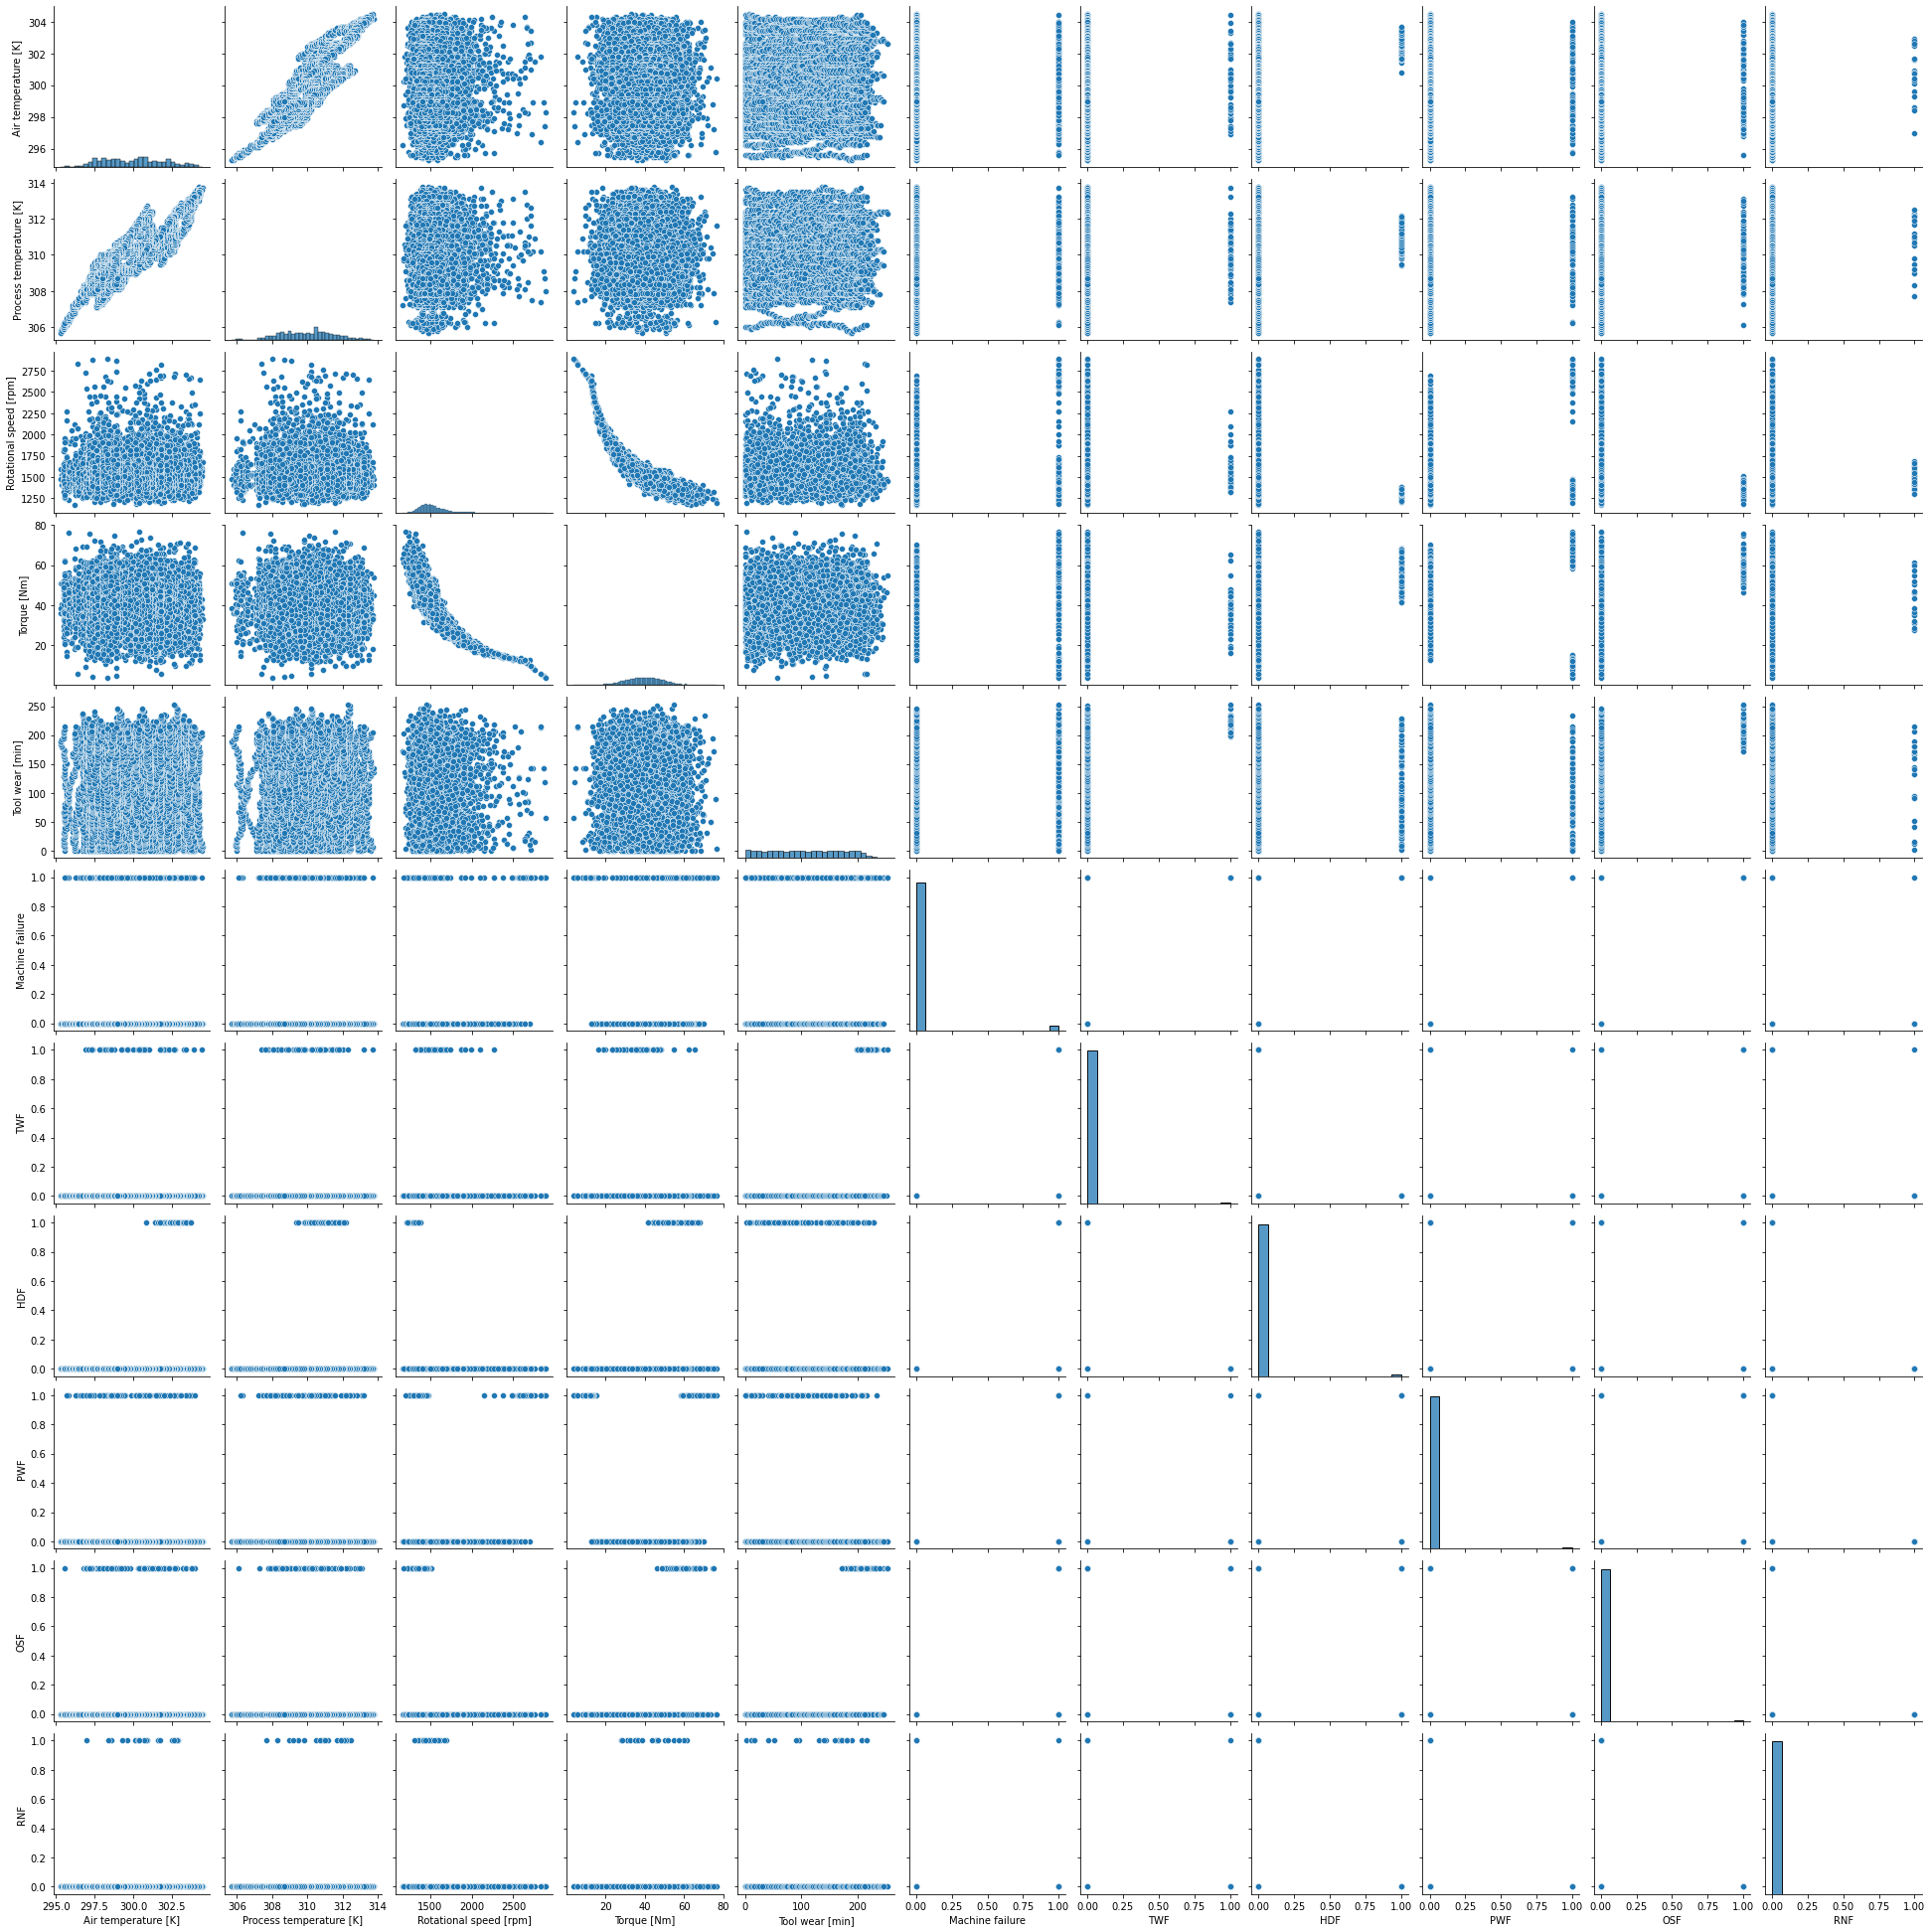

In [ ]:
sn.pairplot(bearings)

In [ ]:
features = bearings.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]

In [ ]:
features.shape

(10000, 5)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

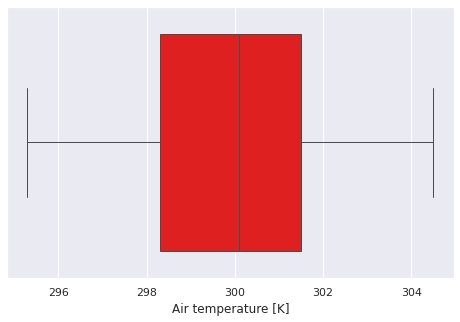

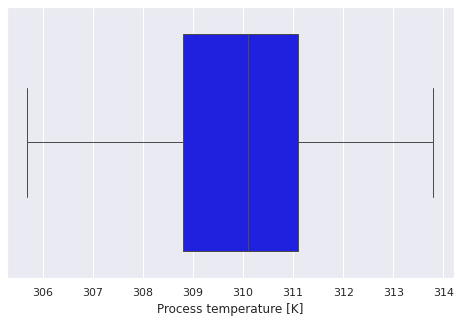

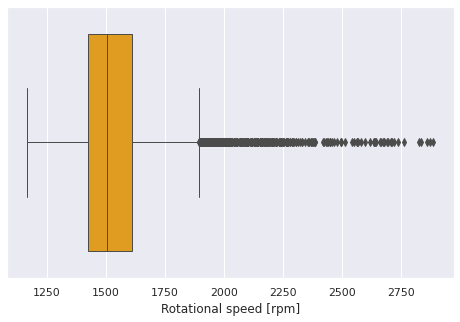

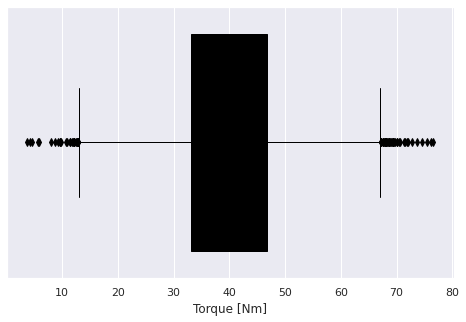

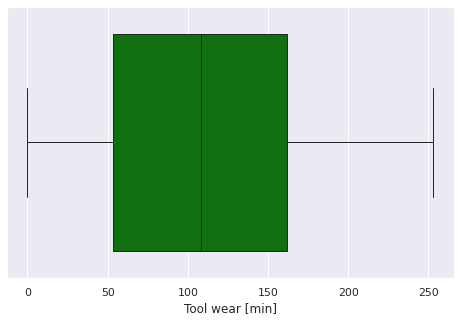

In [ ]:
colors=['red','blue','orange','black','green']
j=0
for i in df1.columns:
    plt.figure()
    plt.tight_layout()
    sn.set(rc={"figure.figsize":(8, 5)})
    sn.boxplot(df1[i] , linewidth= 1.0, color=colors[j])
    j=j+1

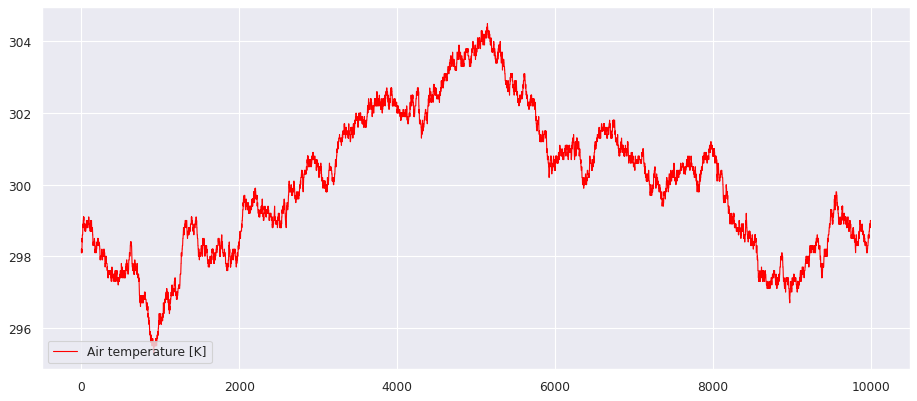

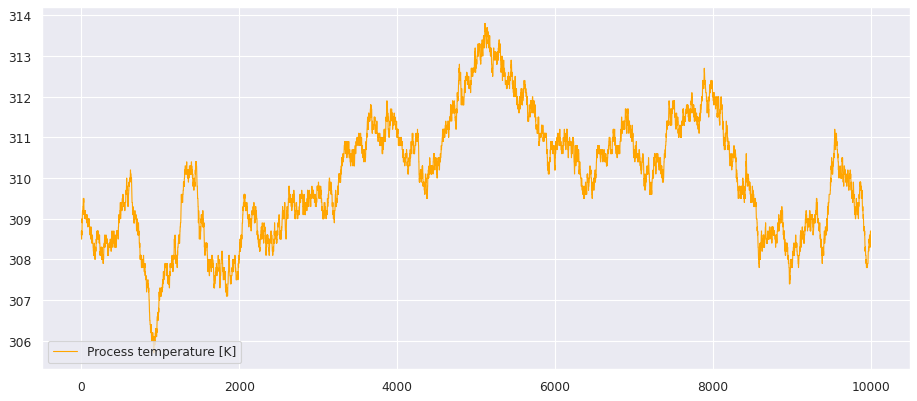

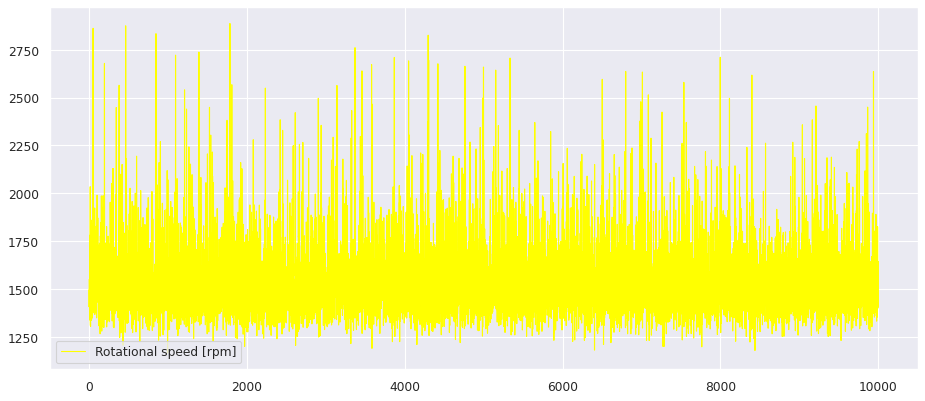

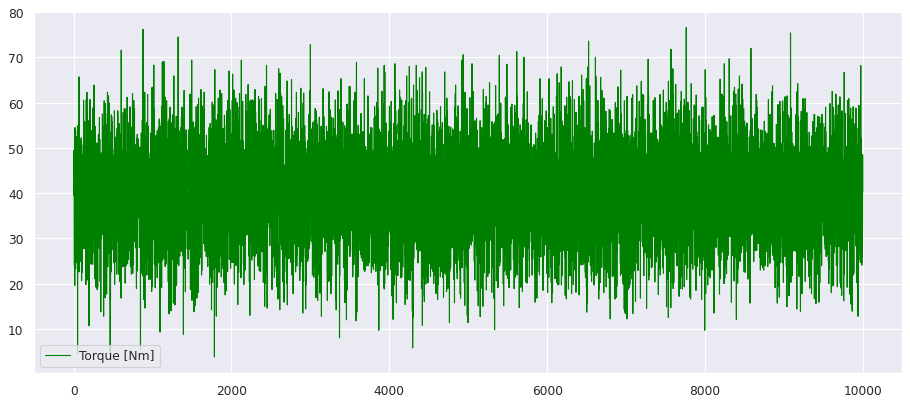

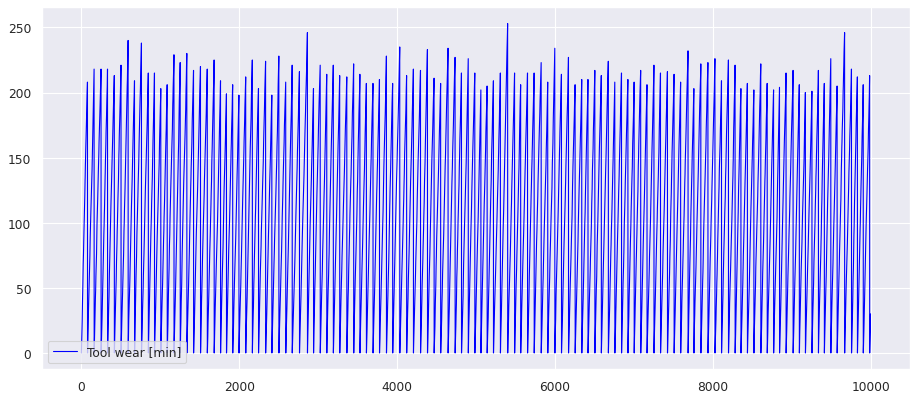

In [ ]:
#LINE CHART


c = ['red', 'orange', 'yellow', 'green', 'blue']
j=0

for i in df1.columns:
  fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
  ax.plot(df1[i], label=i, color=c[j], animated = True, linewidth=1)
  plt.legend(loc='lower left')
  plt.show()
  j=j+1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_t=scaler.fit_transform(features)

In [ ]:
train = feature_t[:7800,:]
test = feature_t[7800:,:]

In [ ]:
train = train.reshape(train.shape[0],1,train.shape[1])
test = test.reshape(test.shape[0],1,test.shape[1])


In [ ]:
train.shape

(7800, 1, 5)

In [ ]:
from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
model = autoencoder_model(train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1408      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVector  (None, 1, 4)             0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [ ]:
nb_epochs = 80
batch_size = 10
history = model.fit(train, train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/80
741/741 [==============================] - 12s 6ms/step - loss: 0.1656 - val_loss: 0.1215
Epoch 2/80
741/741 [==============================] - 4s 5ms/step - loss: 0.1000 - val_loss: 0.1263
Epoch 3/80
741/741 [==============================] - 5s 6ms/step - loss: 0.0781 - val_loss: 0.0929
Epoch 4/80
741/741 [==============================] - 4s 6ms/step - loss: 0.0672 - val_loss: 0.0951
Epoch 5/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0651 - val_loss: 0.0940
Epoch 6/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0636 - val_loss: 0.0898
Epoch 7/80
741/741 [==============================] - 5s 7ms/step - loss: 0.0617 - val_loss: 0.0917
Epoch 8/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0536 - val_loss: 0.0627
Epoch 9/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0341 - val_loss: 0.0603
Epoch 10/80
741/741 [==============================] - 5s 7ms/step - loss: 0.0289 - val_loss: 0.048

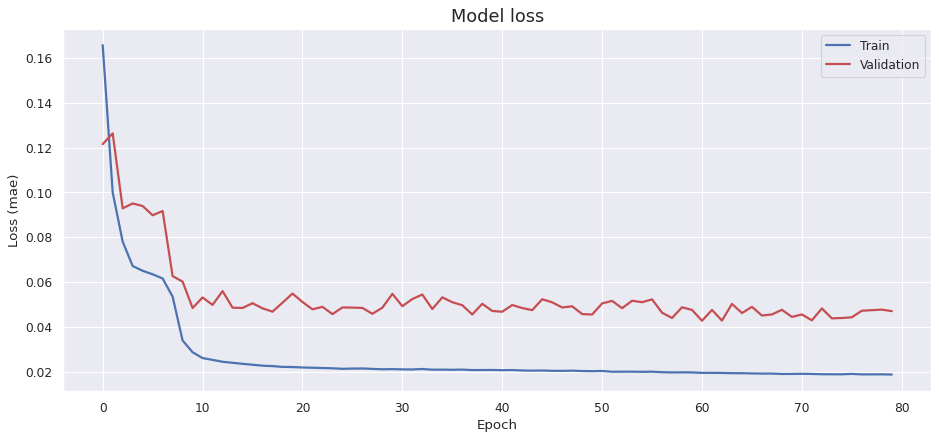

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
import keras
loss = keras.losses.Huber()

In [ ]:
loss

In [ ]:
model = autoencoder_model(train)
model.compile(optimizer='adam', loss=loss)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 16)             1408      
                                                                 
 lstm_5 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_7 (LSTM)               (None, 1, 16)             1344      
                                                           

In [ ]:
nb_epochs = 80
batch_size = 10
history = model.fit(train, train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/80
741/741 [==============================] - 10s 6ms/step - loss: 0.0241 - val_loss: 0.0115
Epoch 2/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0075 - val_loss: 0.0061
Epoch 3/80
741/741 [==============================] - 4s 6ms/step - loss: 0.0039 - val_loss: 0.0055
Epoch 4/80
741/741 [==============================] - 5s 6ms/step - loss: 0.0036 - val_loss: 0.0057
Epoch 5/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 6/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 7/80
741/741 [==============================] - 5s 7ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 8/80
741/741 [==============================] - 3s 5ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 9/80
741/741 [==============================] - 4s 5ms/step - loss: 0.0034 - val_loss: 0.0057
Epoch 10/80
741/741 [==============================] - 4s 6ms/step - loss: 0.0034 - val_loss: 0.005

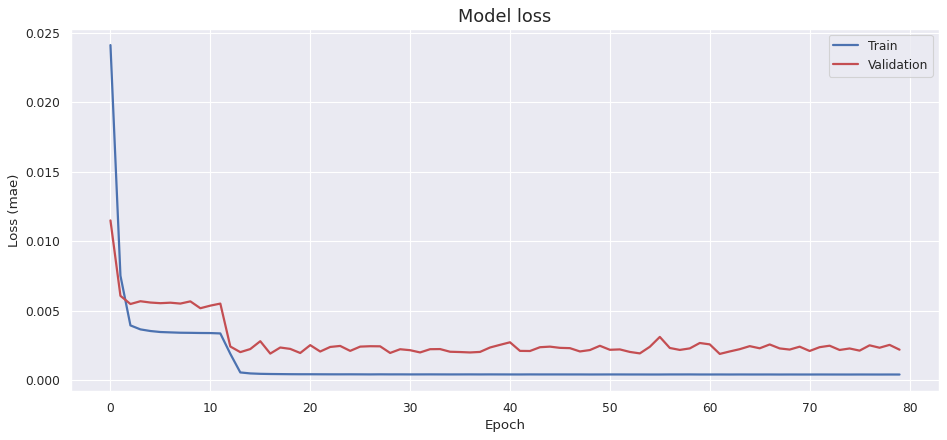

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()